In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv(r"./data/clustered_data.csv")
df.head()

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth,cluster
0,68,2,0,0,0,58138.0,1617.0,4711.0,58,635,81,546,120.5,81,88.0,8,10,4,3,0,7,2
1,71,2,0,1,2,46344.0,27.0,4161.0,38,11,1,6,2.0,1,6.0,1,1,2,2,0,5,1
2,60,2,1,0,0,71613.0,776.0,4360.0,26,426,49,127,111.0,21,42.0,8,2,10,1,0,4,2
3,41,2,1,1,1,26646.0,53.0,4187.0,26,11,4,20,10.0,3,5.0,2,0,4,2,0,6,1
4,44,4,1,1,1,58293.0,422.0,4209.0,94,173,43,118,46.0,27,15.0,5,3,6,5,0,5,0


In [3]:
df.shape

(2240, 22)

In [4]:
x = df.drop("cluster", axis=1)
y = df["cluster"]

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [6]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [7]:
# A function which can evaluate model and return a report
def evaluate_models(x, y, models):
    models_list = []
    models_scores = []

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        score = accuracy_score(y_test, y_pred)

        model_name = list(models.keys())[i]
        print(f'score for {model_name} is ')
        print(f'{score}')
        models_list.append(model_name)
        models_scores.append(score)
    
    print()
    report = pd.DataFrame()
    report['Model Name'] = models_list
    report['Scores'] = models_scores
    return report

In [8]:
report = evaluate_models(x, y, models)

score for Random Forest is 
0.9665178571428571
score for Decision Tree is 
0.9419642857142857
score for Gradient Boosting is 
0.96875
score for Logistic Regression is 
0.8839285714285714
score for K-Neighbors Classifier is 
0.8214285714285714
score for XGBClassifier is 
0.9665178571428571
score for CatBoosting Classifier is 
0.9776785714285714
score for AdaBoost Classifier is 
0.9419642857142857



In [9]:
report.sort_values('Scores')

,Model Name,Scores
4,K-Neighbors Classifier,0.821429
3,Logistic Regression,0.883929
7,AdaBoost Classifier,0.941964
1,Decision Tree,0.941964
5,XGBClassifier,0.966518
0,Random Forest,0.966518
2,Gradient Boosting,0.968750
6,CatBoosting Classifier,0.977679


- ### From the report above we can see that the CatBoosting Classifier model performed the best.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

x_train

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
792,75,2,0,0,0,16813.0,50.0,4393.0,49,4,8,11,12.0,2,13.0,2,0,3,1,1,7
1271,62,3,0,1,1,64191.0,825.0,4571.0,30,420,15,186,120.5,38,15.0,5,3,13,3,0,3
1538,54,4,1,1,1,71969.0,1086.0,4669.0,59,1000,0,76,0.0,0,10.0,3,4,9,3,1,8
668,57,4,1,1,1,29187.0,34.0,4464.0,43,26,0,6,0.0,0,2.0,1,0,3,1,0,8
1975,56,2,1,1,1,4428.0,359.0,4315.0,0,16,4,12,2.0,4,126.5,25,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,56,2,1,1,2,44078.0,41.0,4058.0,17,24,1,10,2.0,0,4.0,2,0,3,2,0,5
1095,46,2,0,1,1,61825.0,424.0,4374.0,56,162,50,100,55.0,30,27.0,4,2,8,1,0,4
1130,74,3,1,1,1,67381.0,957.0,4578.0,67,815,8,53,11.0,0,70.0,2,2,9,4,1,7
1294,62,4,0,1,2,48918.0,62.0,4126.0,21,52,0,9,0.0,0,1.0,1,0,4,2,0,4


### Hyperparameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300],
    'l2_leaf_reg': [1, 3, 5]
}

catboost = CatBoostClassifier(
    loss_function='MultiClass',
    verbose=0,
    task_type='CPU'
)

grid_search = GridSearchCV(estimator=catboost,param_grid=params,cv=3,scoring='accuracy',n_jobs=2,verbose=3)
grid_search.fit(x_train, y_train)
print(f'Best Parameters Found: {grid_search.best_params_}')
print(f'Best Accuracy Score: {grid_search.best_score_}')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters Found: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best Accuracy Score: 0.9720929060015798


### Training the model with those parameters.

In [12]:
best_cat_model = CatBoostClassifier(
    loss_function='MultiClass',
    verbose=0,
    task_type='CPU',
    depth=6,
    iterations=300,
    l2_leaf_reg=5,
    learning_rate=0.1
)

In [13]:
best_model = best_cat_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("CatBoosting Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

CatBoosting Classifier
Accuracy Score value: 0.9732
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       153
           1       0.99      0.97      0.98       167
           2       0.98      0.97      0.98       128

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



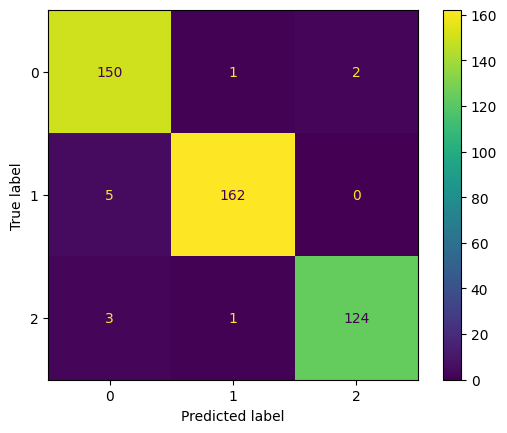

In [14]:
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)

**Reports**

- The model performed pretty well.
- we have used CatBoosting Classifier as it performed well than other models
- We got a good accuracy while predicting the test dataset.